In [1]:
import spacy
from collections import Counter
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
text = 'NLP is a fun course'
doc = nlp(text)
for token in doc:
  print (token.text, token.tag_, token.head.text, token.dep_)

NLP NNP is nsubj
is VBZ is ROOT
a DT course det
fun NN course amod
course NN is attr


In [9]:
# [TODO1]: render the dependency tree with displacy
# displacy.render(...)

displacy.render(doc, style='dep', jupyter=True)

## Dependency tree parsing: Extract Opinions from Customer Reviews
The dataset consists of 1000 rows and 2 columns. Review Column consist of customer reviews and like column consist of 0 and 1. If the review is positive, 1 and if negative, 0.

In [10]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/yilihsu/NLP110/main/Customer_Reviews.tsv', sep="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [11]:
df['spacy_doc'] = list(nlp.pipe(df.Review))
df_positive = df[df.Liked == 1]
df_negative = df[df.Liked == 0]

In [12]:
# [TODO2] : count the top-10 common adj in the reviews]
#positive_adj = list all of adj in the positive reviews (df_positive)
positive_adj = [token.text for doc in df_positive.spacy_doc 
           for token in doc if token.pos_=='ADJ']
print("adj in positive reviews")
print(positive_adj)
#negative_adj = list all of adj in the negative reviews (df_negative)
negative_adj = [token.text for doc in df_negative.spacy_doc 
           for token in doc if token.pos_=='ADJ']
print("adj in negative reviews")
print(negative_adj)

adj in positive reviews
['late', 'great', 'great', 'great', 'prompt', 'amazing', 'cute', 'less', 'beautiful', 'right', 'red', 'ohhh', 'good', 'great', 'Mexican', 'friendly', 'decent', 'happier', 'only', 'inexpensive', 'Ample', 'good', 'first', 'positive', 'attentive', 'great', 'only', 'prime', 'good', 'Greek', 'tasty', 'refreshing', 'pink', 'tender', 'nice', 'good', 'huge', 'friendly', 'great', 'wonderful', 'imaginative', 'right', 'handmade', 'delicious', 'glad', 'Great', 'huge', 'military', 'great', 'second', 'amazing', 'great', 'good', 'sweet', 'good', 'seasoned', 'second', 'good', 'yummy', 'amazing', 'fresh', 'delicious', 'sexy', 'hottest', 'Best', 'up', 'good', 'fantastic', 'only', 'good', 'helpful', 'Best', 'tender', 'delicious', 'better', 'fantastic', 'delicious', 'attentive', 'personable', 'great', 'wonderful', 'next', 'good', 'fantastic', 'worth', 'Nice', 'tender', 'Good', 'fine', 'friendly', 'best', 'worst', 'best', 'good', 'Phenomenal', 'worth', 'next', 'excellent', 'good', '

In [13]:
print("Top-10 adj in positive reviews")
Counter(positive_adj).most_common(10)

Top-10 adj in positive reviews


[('good', 66),
 ('great', 49),
 ('friendly', 24),
 ('amazing', 22),
 ('nice', 18),
 ('delicious', 18),
 ('Great', 17),
 ('best', 12),
 ('first', 10),
 ('fresh', 10)]

In [ ]:
print("Top-10 adj in negative reviews")
Counter(negative_adj).most_common(10)

Top-10 adj in negative reviews


[('good', 22),
 ('bad', 16),
 ('slow', 11),
 ('disappointed', 11),
 ('other', 10),
 ('better', 10),
 ('worst', 9),
 ('more', 8),
 ('bland', 8),
 ('cold', 8)]

In [ ]:
noun_strings = ["food", "service"]
# Consider every noun in the noun strings,
# extract a list of adjectives modifying this noun
for noun in noun_strings:
  amod_list = []
  #[TODO3]: extract a list of adjectives modifying this noun (amod)
  for doc in df_positive.spacy_doc :
      for token in doc:
        if (token.text) == noun:
          for child in token.children: 
            if child.dep_ == 'amod':
              amod_list.append(child.text.lower())
  print("-----------------------------------------------------")
  print("Adj describing " + noun + " in positive reviews")
  print(amod_list)
  print("")
  print("Top-10 Adj describing " + noun + " in positive reviews")
  print(Counter(amod_list).most_common(10))

print("-----------------------------------------------------")

-----------------------------------------------------
Adj describing food in positive reviews
['amazing', 'great', 'great', 'good', 'phenomenal', 'fantastic', 'great', 'healthy', 'authentic', 'typical', 'authentic', 'mexican', 'great', 'great', 'great', 'good', 'good', 'great', 'tasty', 'good']

Top-10 Adj describing food in positive reviews
[('great', 7), ('good', 4), ('authentic', 2), ('amazing', 1), ('phenomenal', 1), ('fantastic', 1), ('healthy', 1), ('typical', 1), ('mexican', 1), ('tasty', 1)]
-----------------------------------------------------
Adj describing service in positive reviews
['great', 'excellent', 'fantastic', 'good', 'clean', 'fantastic', 'great', 'excellent', 'great', 'great', 'good', 'awesome', 'speedy', 'friendly', 'best', 'great', 'great', 'perfect']

Top-10 Adj describing service in positive reviews
[('great', 6), ('excellent', 2), ('fantastic', 2), ('good', 2), ('clean', 1), ('awesome', 1), ('speedy', 1), ('friendly', 1), ('best', 1), ('perfect', 1)]
--------

# Hidden Markov Models
Let's take weather as an example.
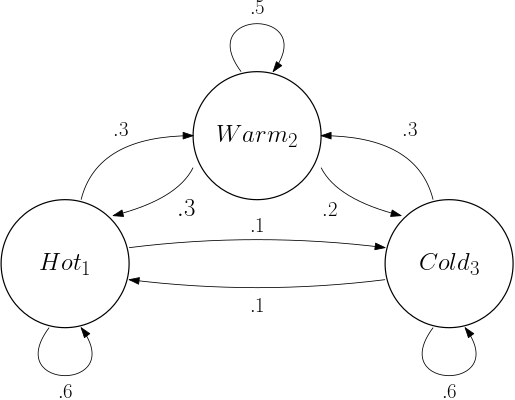

From the above image, the transition matrix can be obtained:

$M = \left( \begin{array}{ccc} .6 & .3 & .1 \\ .3 & .5 & .2 \\ .1 & .3 & .6 \end{array}\right)$

If we have no information about the recent weather, then from the past statistics, we assume 35% of the time it
is hot, 37.5% it is warm and 27.5% it is cold. This will be the initial probabilities

$\pi = \left( \begin{array}{c} .350 \\ .375 \\ .275 \end{array} \right)$

# Add Observations
What do we do according to the weather? When the weather is hot, we have 50% chance of eating ice cream, and when the weather is warm, we have 20% chance eating ice cream ... as for the weather is cold, we get only 10% chance of eatning ice cream.

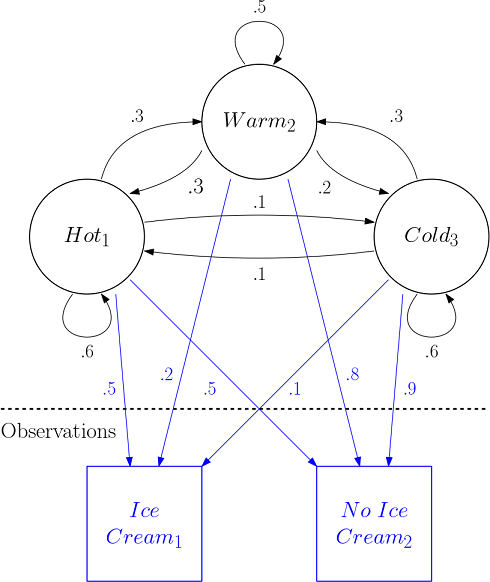


### Can we figure out what happened from observations? 
i.e., can we know the weather from an "ice cream eating history"?

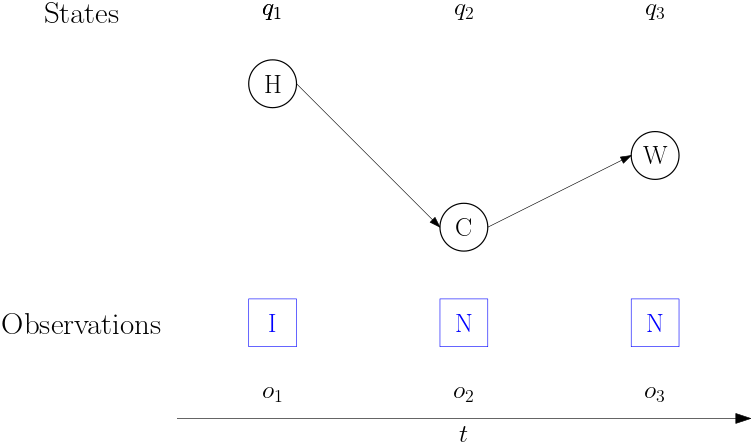

Given a sequence of observations $o_1 o_2 \ldots o_t$ can we ...


*  **Filter** Find $P(q_t | o_1 o_2 \ldots o_t)$  (i.e. What's going on now) 
*  **Predict** Find $P(q_{t+k} | o_1 o_2 \ldots o_t)$ (i.e. What's going to happen)
*  **Smooth** Find $P(q_k | o_1 o_2 \ldots o_t)$ for $1 \le k < t$ (i.e. What happened knowning the full observation sequence) 
*  **Explain** What is the most likely sequence of state $q_1 q_2 \ldots q_t$ given the observations $o_1 o_2 \ldots o_t$
*  **Learn** Find the HMM just from a sequence of observations



# Let's try HMM in NLP application!
We implement HMM for POS tagging task. To better understand the task formulation, the following information may be useful.

**Observation:** token in each sentence

**Hidden state:** the POS tag

**Emission probability:** the probability for a word to be in a particular class of POS tag

**Transition probability:** the probability of a POS followed by another POS. For example, what are the chances of a noun followed by a verb?

**Goal:** Given observation (sentence without POS tag), find the hidden states (the POS tag corresponding to the input sentence).


In [ ]:
# Importing libraries
import nltk
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import pprint, time
 
#download the treebank corpus from nltk
nltk.download('treebank')
 
#download the universal tagset from nltk
nltk.download('universal_tagset')
 
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))
 
#print the first two sentences along with tags
print(nltk_data[:2])

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')]]


In [ ]:
# split data into training and validation set in the ratio 80:20
train_set, test_set =train_test_split(nltk_data,train_size=0.80,test_size=0.20,random_state = 101)

In [ ]:
# create list of train and test tagged words
train_tagged_words = [ tup for sent in train_set for tup in sent ]
test_tagged_words = [ tup for sent in test_set for tup in sent ]
print(f"size of training set: {len(train_tagged_words)}")
print(f"size of testing set: {len(test_tagged_words)}") # we don't actually use all of them when testing.

size of training set: 80310
size of testing set: 20366


In [ ]:
#use set datatype to check how many unique tags are present in training data
tags = {tag for word,tag in train_tagged_words}
print(f"number of different tags in the training data: {len(tags)}")
print(tags)
 
# check total words in vocabulary
vocab = {word for word,tag in train_tagged_words}

number of different tags in the training data: 12
{'DET', 'PRON', 'CONJ', 'NUM', 'ADV', '.', 'ADJ', 'NOUN', 'X', 'VERB', 'PRT', 'ADP'}


In [ ]:
# compute emission probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    '''
    word: a given token
    tag: a given tag
    train_bag: the training data, list of tuple. e.g. [('Drink', 'NOUN'), ('Carrier', 'NOUN') ... ]
    return: the probability for the given word to be in the given POS tag
    '''
    tag_list = [pair for pair in train_bag if pair[1]==tag]

    count_tag = len(tag_list) # total number of times the passed tag occurred in train_bag
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]


    # [TODO4]: calculate the total length of w_given_tag_list
    # count_w_given_tag = len(...)
    count_w_given_tag = len(w_given_tag_list)
    # [TODO5]: calculate the emission probability
    # emission_prob = the number of (word given the tag) / (the number of tag)
    emission_prob = count_w_given_tag / count_tag
    return emission_prob

In [ ]:
# compute transition probability
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0

    for index in range(len(tags)-1):
      # [TODO6]: calculate count_t2_t1, which is the number of tag t2 given tag t1.
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1

     # [TODO7]: calculate the transmission probability
    transition_prob = count_t2_t1/count_t1
    return transition_prob

In [ ]:
# creating t x w emission matrix of tags, t = number of tags, w = number of words
# matrix(i, j) represents P(jth tag after the ith tag)
 
emission_matrix = np.zeros((len(tags), len(list(vocab)[:12])), dtype='float32')
for i, t in enumerate(list(tags)):
    for j, word in enumerate(list(vocab)[:12]): 
        emission_matrix[i, j] = word_given_tag(word, t)

# convert the matrix to a df for better readability
emission_matrix_df = pd.DataFrame(emission_matrix, columns = list(tags), index=list(list(vocab)[:12]))
display(emission_matrix_df)

,DET,PRON,CONJ,NUM,ADV,.,ADJ,NOUN,X,VERB,PRT,ADP
6.20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
*T*-197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sphere,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.5,0.000357,0.000000,0.000000,0.001071,0.000000,0.000000,0.000000,0.000000,0.000000,0.000357,0.000000,0.000000
liquid,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fair,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
totaled,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000194,0.000000
X,0.000000,0.000000,0.000087,0.000000,0.000044,0.000087,0.000000,0.000087,0.000044,0.000000,0.000000,0.000044
Deregulation,0.000000,0.000192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000829,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
tags_matrix = np.zeros((len(tags), len(tags)), dtype='float32')
for i, t1 in enumerate(list(tags)):
    for j, t2 in enumerate(list(tags)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)

In [ ]:
# creating t x t transition matrix of tags, t = number of tags, i.e. 12
# matrix(i, j) represents P(jth tag after the ith tag)
 
transition_matrix = np.zeros((len(tags), len(tags)), dtype='float32')
for i, t1 in enumerate(list(tags)):
    for j, t2 in enumerate(list(tags)): 
        transition_matrix[i, j] = t2_given_t1(t2, t1)

In [ ]:
# convert the matrix to a df for better readability
transition_df = pd.DataFrame(transition_matrix, columns = list(tags), index=list(tags))
display(transition_df)

,DET,PRON,CONJ,NUM,ADV,.,ADJ,NOUN,X,VERB,PRT,ADP
DET,0.006037,0.003306,0.000431,0.022855,0.012074,0.017393,0.206411,0.635906,0.045134,0.040247,0.000287,0.009918
PRON,0.009567,0.006834,0.005011,0.006834,0.036902,0.041913,0.070615,0.212756,0.088383,0.484738,0.014123,0.022323
CONJ,0.123491,0.060373,0.000549,0.040615,0.057080,0.035126,0.113611,0.349067,0.009330,0.150384,0.004391,0.055982
NUM,0.003570,0.001428,0.014281,0.184220,0.003570,0.119243,0.035345,0.351660,0.202428,0.020707,0.026062,0.037487
ADV,0.071373,0.012025,0.006982,0.029868,0.081458,0.139255,0.130721,0.032196,0.022886,0.339022,0.014740,0.119472
.,0.172192,0.068769,0.060079,0.078210,0.052569,0.092372,0.046132,0.218539,0.025641,0.089690,0.002789,0.092908
ADJ,0.005243,0.000194,0.016893,0.021748,0.005243,0.066019,0.063301,0.696893,0.020971,0.011456,0.011456,0.080583
NOUN,0.013106,0.004659,0.042454,0.009144,0.016895,0.240094,0.012584,0.262344,0.028825,0.149134,0.043935,0.176827
X,0.056890,0.054200,0.010379,0.003075,0.025754,0.160869,0.017682,0.061695,0.075726,0.206419,0.185086,0.142226
VERB,0.133610,0.035543,0.005433,0.022836,0.083886,0.034807,0.066390,0.110589,0.215930,0.167956,0.030663,0.092357


In [ ]:
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
     
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = transition_df.loc['.', tag]
            else:
                transition_p = transition_df.loc[state[-1], tag]
                 
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)
            # Compute the state probability by multiplying emission probability and transition probability
            state_probability = emission_p * transition_p    
            p.append(state_probability)
             
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [ ]:
# Let's test our Viterbi algorithm on a few sample sentences of test dataset
random.seed(1234)
 
# choose random 10 numbers for test sample index
# because testing all of them is time consuming.
rndom = random.sample(range(len(test_set)), 10)
 
# list of 10 sents on which we test the model
sampled_data = [test_set[i] for i in rndom]
 
# list of tagged words
test_data_with_tag = [tup for sent in sampled_data for tup in sent]
 
# list of untagged words
test_data_without_tag = [tup[0] for sent in sampled_data for tup in sent]

In [ ]:
start = time.time()
test_tagged_seq = Viterbi(test_data_without_tag, train_bag=train_tagged_words)
end = time.time()
difference = round(end-start, 2)
print("Time taken in seconds: ", difference)
 
# testing accuracy
num_correct = [i for i, j in zip(test_data_with_tag, test_tagged_seq) if i == j] 
accuracy = len(num_correct)/len(test_tagged_seq)
print('Testing accuracy of HMM with Viterbi algorithm: ', round(accuracy*100, 2))

Time taken in seconds:  30.51
Testing accuracy of HMM with Viterbi algorithm:  87.29


In [ ]:
print(test_tagged_seq)

[('Newsweek', 'NOUN'), ("'s", 'PRT'), ('circulation', 'NOUN'), ('for', 'ADP'), ('the', 'DET'), ('first', 'ADJ'), ('six', 'NUM'), ('months', 'NOUN'), ('of', 'ADP'), ('1989', 'NUM'), ('was', 'VERB'), ('3,288,453', 'DET'), (',', '.'), ('*-1', 'X'), ('flat', 'ADJ'), ('from', 'ADP'), ('the', 'DET'), ('same', 'ADJ'), ('period', 'NOUN'), ('last', 'ADJ'), ('year', 'NOUN'), ('.', '.'), ('Roederer', 'NOUN'), ('Cristal', 'NOUN'), ('at', 'ADP'), ('$', '.'), ('90', 'NUM'), ('*U*', 'X'), ('a', 'DET'), ('bottle', 'NOUN'), ('sells', 'VERB'), ('out', 'PRT'), ('around', 'ADP'), ('the', 'DET'), ('country', 'NOUN'), ('and', 'CONJ'), ('Taittinger', 'DET'), ("'s", 'VERB'), ('Comtes', 'DET'), ('de', 'X'), ('Champagne', 'NOUN'), ('Blanc', 'DET'), ('de', 'X'), ('Blancs', 'DET'), ('is', 'VERB'), ('encroaching', 'DET'), ('upon', 'ADP'), ('that', 'DET'), ('level', 'NOUN'), ('.', '.'), ('In', 'ADP'), ('*-2', 'X'), ('ending', 'VERB'), ('Hungary', 'NOUN'), ("'s", 'PRT'), ('part', 'NOUN'), ('of', 'ADP'), ('the', 'DET